# Explore here

In [1]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
main_data=pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv')

In [3]:
main_data

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633
...,...,...
361,2023-08-30 17:10:08.079328,989.600354
362,2023-08-31 17:10:08.079328,994.987326
363,2023-09-01 17:10:08.079328,995.814415
364,2023-09-02 17:10:08.079328,997.350214


In [4]:
main_data.head()

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633


In [5]:
main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    366 non-null    object 
 1   sales   366 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [6]:
main_data['date']=pd.to_datetime(main_data.date)
main_data=main_data.set_index('date')

In [7]:
ts_data=main_data['sales']
ts_data.head()

date
2022-09-03 17:10:08.079328    55.292157
2022-09-04 17:10:08.079328    53.803211
2022-09-05 17:10:08.079328    58.141693
2022-09-06 17:10:08.079328    64.530899
2022-09-07 17:10:08.079328    66.013633
Name: sales, dtype: float64

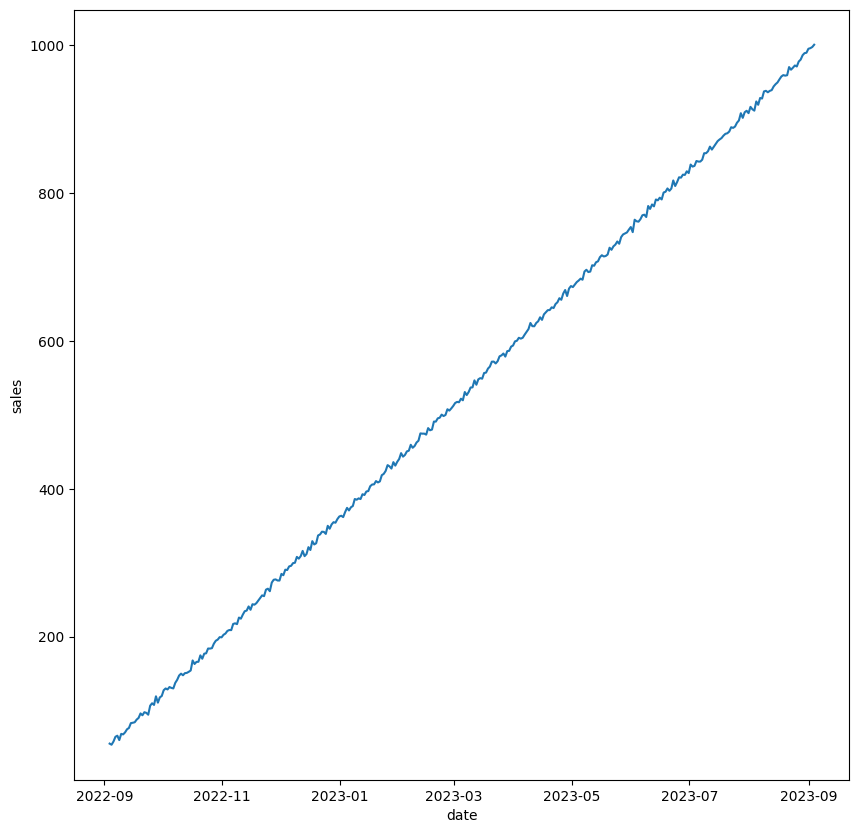

In [8]:
fig,axis=plt.subplots(figsize=(10,10))
sns.lineplot(data=ts_data)
plt.show()

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [10]:
decomposition=seasonal_decompose(ts_data,period=12)
decomposition

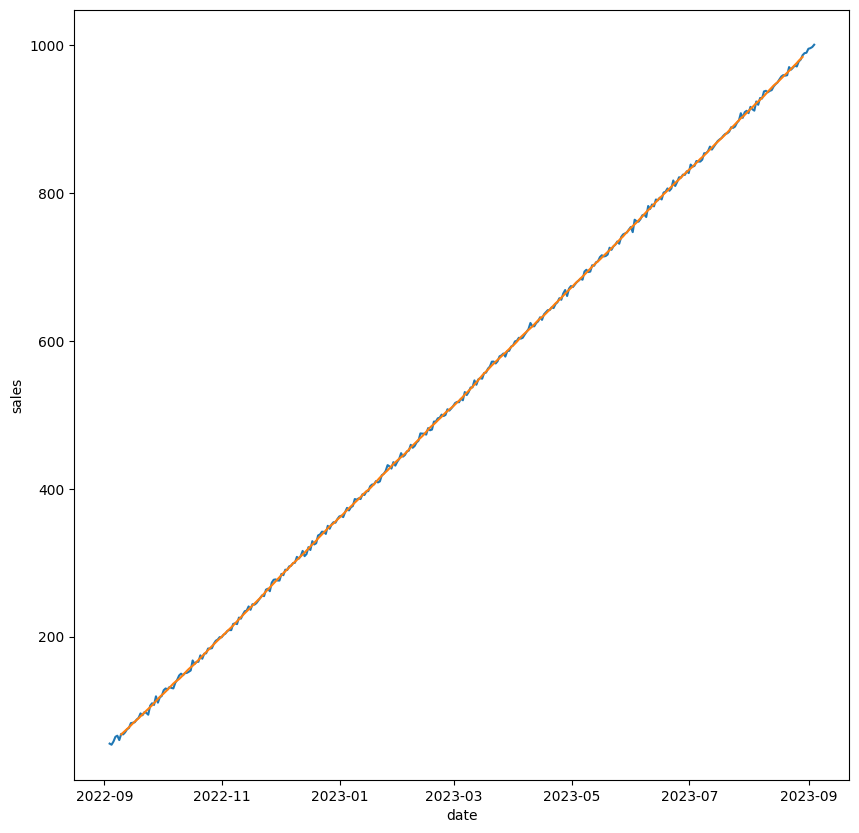

In [11]:
trend=decomposition.trend
fig,axis = plt.subplots(figsize=(10,10))
sns.lineplot(data=ts_data)
sns.lineplot(data=trend)
plt.show()

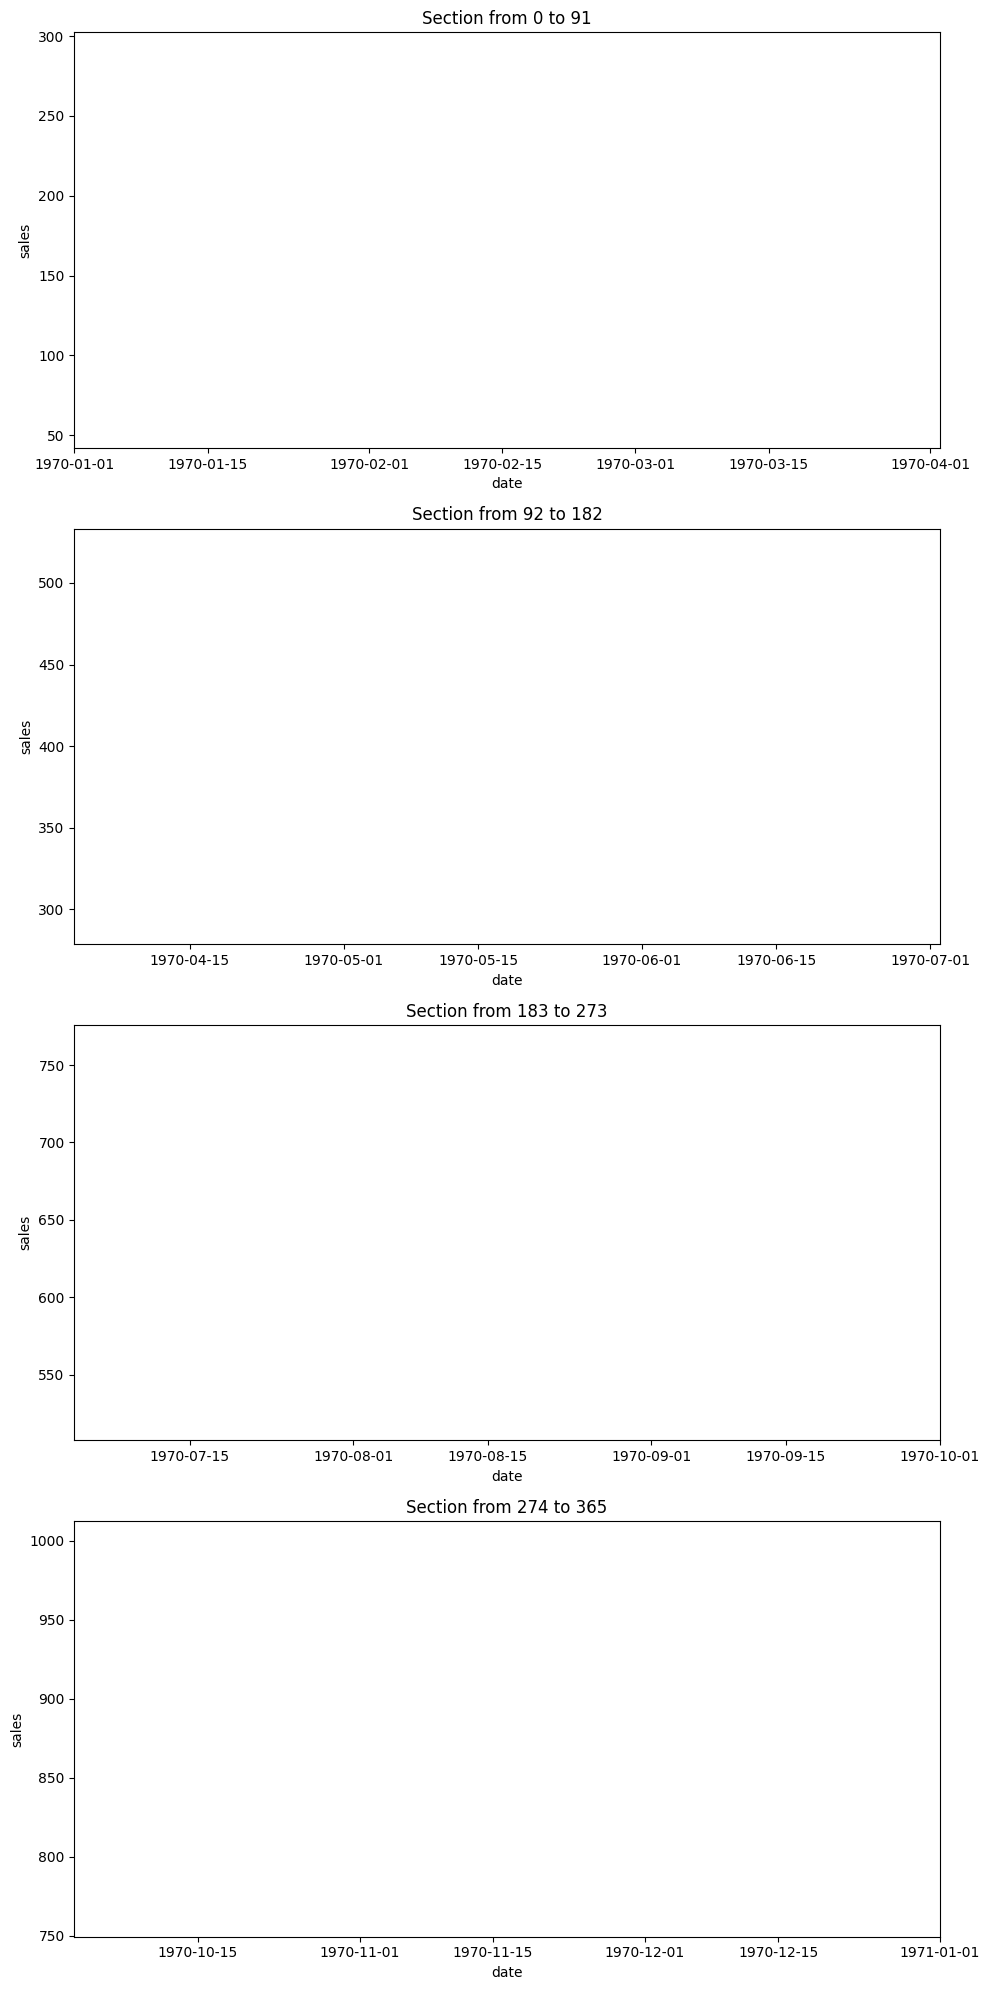

In [15]:
sections = [
    (0, 91),   # First section: 0 to 91 (inclusive)
    (92, 182),  # Second section: 92 to 182 (inclusive)
    (183, 273), # Third section: 183 to 273 (inclusive)
    (274, 365)  # Fourth section: 274 to 365 (inclusive)
]

fig, axes = plt.subplots(nrows=len(sections), figsize=(10, 20))

for ax, (start, end) in zip(axes, sections):
    sns.lineplot(data=ts_data[start:end+1], ax=ax)
    ax.set_xlim([start, end])
    ax.set_title(f'Section from {start} to {end}')
    
plt.tight_layout()
plt.show()